In [1]:
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipykernel_20013/1293129172.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


### Import and process data

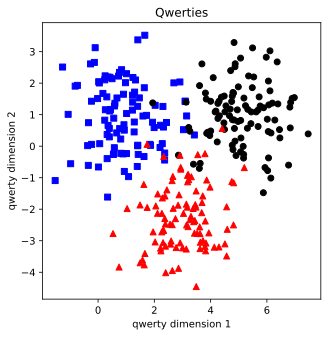

In [3]:
# create data

nPerClust=100
blur=1

A=[1,1]
B=[5,1]
C=[3,-2]

# generate data
a=[A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b=[B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]
c=[C[0]+np.random.randn(nPerClust)*blur, C[1]+np.random.randn(nPerClust)*blur]

# truelabels
labels_np=np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)),2*np.ones((nPerClust,1))))

# concat matrix
data_np=np.hstack((a,b,c)).T

# convert to pytorch tensor
data=torch.tensor(data_np).float()
labels=torch.squeeze(torch.tensor(labels_np).long())

# show data
fig=plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^')
plt.title('Qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

### Create ANN model

In [5]:
# model archi
ANNq=nn.Sequential(
    nn.Linear(2,4), # input 2-x and y coordinate
    nn.ReLU(), # activation
    nn.Linear(4,3), # outputs
    nn.Softmax(dim=1), # final activation unit
)

# loss fun
lossfun=nn.CrossEntropyLoss()

# optimizer
optimizer=torch.optim.SGD(ANNq.parameters(),lr=.01)

In [6]:
yHat=ANNq(data)

print(data.shape)
print(yHat.shape)

torch.Size([300, 2])
torch.Size([300, 3])


### Train the model

In [7]:
numepochs=10000

losses=torch.zeros(numepochs)
ongoingAcc=[]

for epochi in range(numepochs):
    # fwd
    yHat=ANNq(data)

    # compute loss
    loss=lossfun(yHat,labels)
    losses[epochi]=loss

    # bck prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    matches=torch.argmax(yHat,axis=1)==labels
    matchesNumeric=matches.float()
    accuracyPct = 100*torch.mean(matchesNumeric)
    ongoingAcc.append(accuracyPct)

# final pred
predictions=ANNq(data)

predlabels=torch.argmax(predictions,axis=1)
totalacc=100*torch.mean((predlabels==labels).float())

### Visualize results

Final Accuracy: 95%


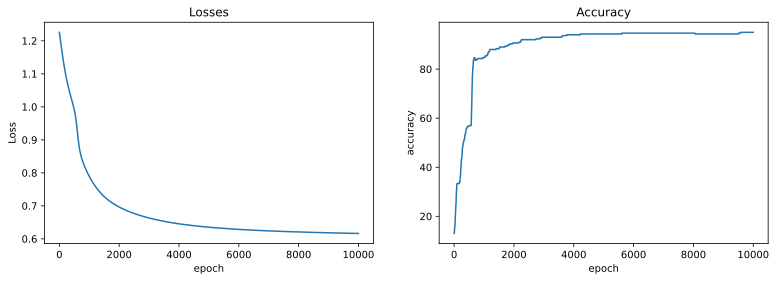

In [8]:
print('Final Accuracy: %g%%'%totalacc)

fig,ax=plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()

In [19]:
torch.sum(yHat,axis=1).unique()

tensor([1.0000, 1.0000, 1.0000, 1.0000], grad_fn=<Unique2Backward0>)

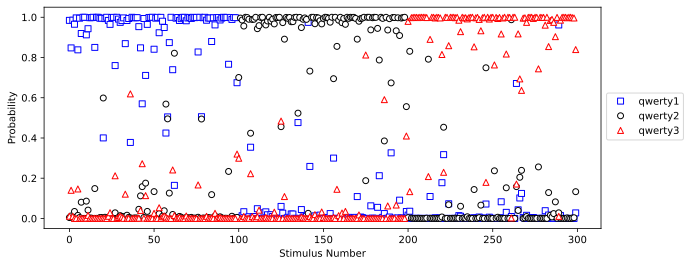

In [20]:
# plot raw model outputs

fig=plt.figure(figsize=(10,4))

colorshape=['bs','ko','r^']
for i in range(3):
    plt.plot(yHat[:,i].detach(),colorshape[i],markerfacecolor='w')

plt.xlabel('Stimulus Number')
plt.ylabel('Probability')
plt.legend(['qwerty1','qwerty2','qwerty3'],loc=(1.01,.4))
plt.show()

Text(0.5, 1.0, 'data:square,circle,triangle  preds:cross')

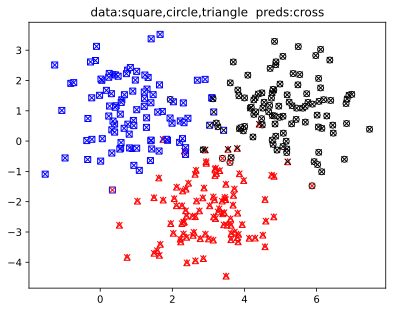

In [36]:

plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs',markerfacecolor='w')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko',markerfacecolor='w')
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^',markerfacecolor='w')


plt.plot(data[np.where(predlabels==0)[0],0],data[np.where(predlabels==0)[0],1],'bx',linewidth=.01)
plt.plot(data[np.where(predlabels==1)[0],0],data[np.where(predlabels==1)[0],1],'kx',linewidth=.01)
plt.plot(data[np.where(predlabels==2)[0],0],data[np.where(predlabels==2)[0],1],'rx',linewidth=.01)

plt.title('data:square,circle,triangle  preds:cross')

In [32]:
data.shape

torch.Size([300, 2])